In [21]:
from statsforecast import StatsForecast
from statsforecast.models import (AutoARIMA, AutoETS, AutoTheta, AutoCES)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import yfinance as yf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Download data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'IBM', 'BTC-USD']
Y_df = yf.download(tickers, start='2000-01-01', interval='1mo')['Adj Close']

# Reset the index and transform the DataFrame
Y_df = Y_df.reset_index().melt(id_vars='Date', var_name='unique_id', value_name='y')
Y_df = Y_df.rename(columns={'Date': 'ds'})
Y_df = Y_df[['unique_id', 'ds', 'y']]
Y_df = Y_df.dropna(subset=['y']).reset_index(drop=True)

# Split data into training and testing sets
Y_train_df = Y_df[Y_df.ds <= '2023-12-01'] # Train set
Y_test_df = Y_df[Y_df.ds > '2023-12-01']   # Test set

[*********************100%%**********************]  8 of 8 completed


In [23]:
season_length = 12 # Define season length as 12 months for monthly data

# Define a list of models for forecasting
models = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

# Instantiate StatsForecast class with models, data frequency ('M' for monthly),
# and parallel computation on all CPU cores (n_jobs=-1)
sf = StatsForecast(
    models=models, # models for forecasting
    freq='M',  # frequency of the data
    n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
)

# Fit the models
sf.fit(df=Y_train_df)

StatsForecast(models=[AutoARIMA,AutoETS,AutoTheta,CES])

In [24]:
# Generate forecasts for the specified horizon
horizon = 6

# Generate the forecast
Y_hat_df = sf.forecast(df=Y_train_df, h=horizon)
Y_hat_df

,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
AAPL,2023-12-31,194.393906,193.461533,191.389145,192.952759
AAPL,2024-01-31,195.197052,195.121017,189.432281,188.099060
AAPL,2024-02-29,199.855011,196.780502,195.294525,196.548950
AAPL,2024-03-31,199.018250,198.439987,197.824234,195.996490
AAPL,2024-04-30,200.115814,200.099472,197.481644,197.100540
AAPL,2024-05-31,201.362915,201.758957,193.149384,203.195694
AMZN,2023-12-31,151.723587,151.939423,153.546082,152.499344
AMZN,2024-01-31,151.894302,151.939423,143.619629,152.004654
AMZN,2024-02-29,151.759628,151.939423,147.515854,154.304489


In [25]:
# Reset the index of Y_hat_df to make unique_id a column
Y_hat_df_reset = Y_hat_df.reset_index()
Y_hat_df_reset

,unique_id,ds,AutoARIMA,AutoETS,AutoTheta,CES
0,AAPL,2023-12-31,194.393906,193.461533,191.389145,192.952759
1,AAPL,2024-01-31,195.197052,195.121017,189.432281,188.099060
2,AAPL,2024-02-29,199.855011,196.780502,195.294525,196.548950
3,AAPL,2024-03-31,199.018250,198.439987,197.824234,195.996490
4,AAPL,2024-04-30,200.115814,200.099472,197.481644,197.100540
5,AAPL,2024-05-31,201.362915,201.758957,193.149384,203.195694
6,AMZN,2023-12-31,151.723587,151.939423,153.546082,152.499344
7,AMZN,2024-01-31,151.894302,151.939423,143.619629,152.004654
8,AMZN,2024-02-29,151.759628,151.939423,147.515854,154.304489
9,AMZN,2024-03-31,151.865875,151.939423,157.233566,156.680359


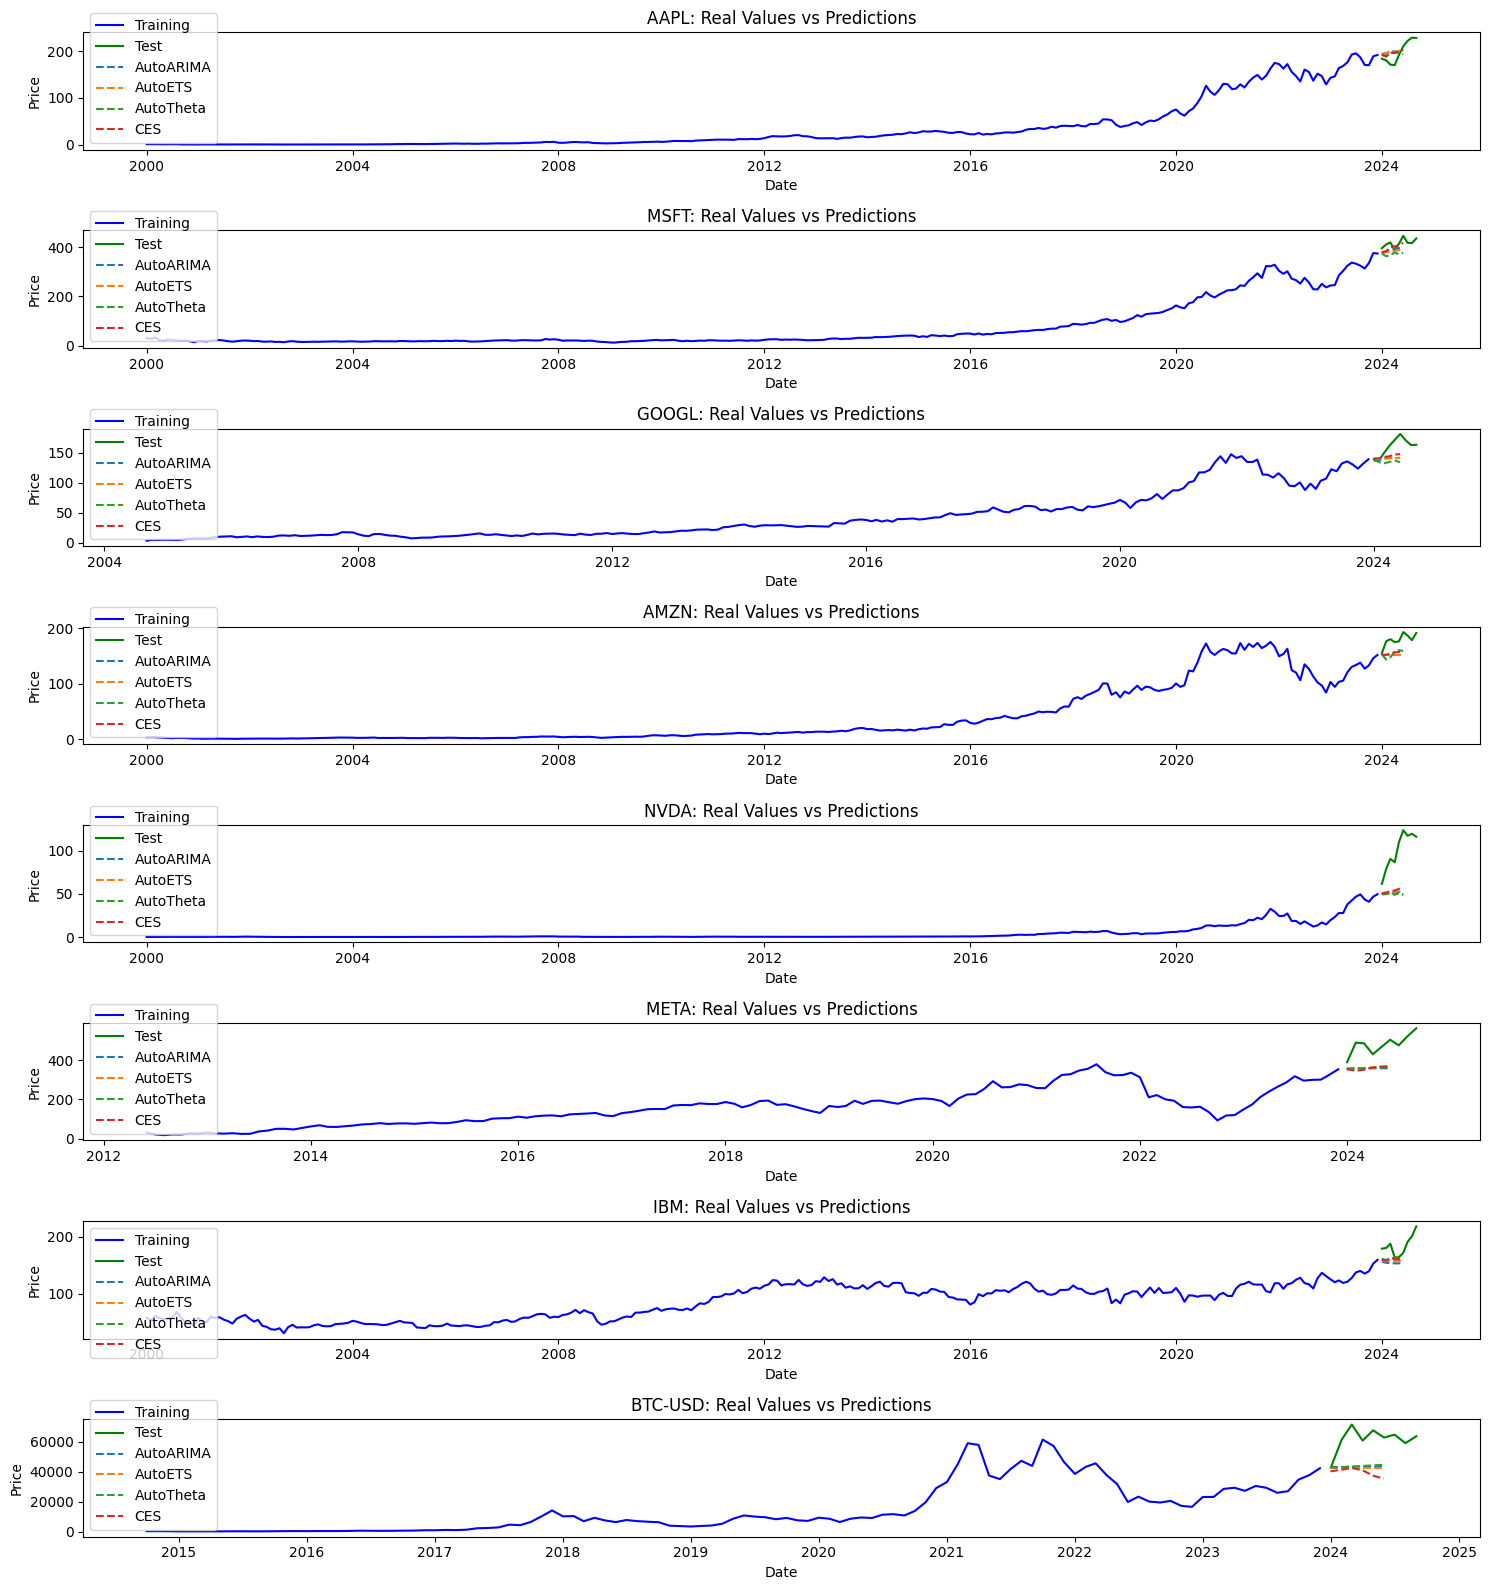

In [26]:
# Create subplots for all tickers
fig, axs = plt.subplots(len(tickers), figsize=(15, 2 * len(tickers)))

# Iterate through each ticker and plot in a separate subplot
for i, ticker in enumerate(tickers):
    # Filter training, test, and prediction data for that ticker
    train_data = Y_train_df[Y_train_df['unique_id'] == ticker]
    test_data = Y_test_df[Y_test_df['unique_id'] == ticker]
    pred_data = Y_hat_df_reset[Y_hat_df_reset['unique_id'] == ticker]
    
    # Plot real training values
    axs[i].plot(train_data['ds'], train_data['y'], label='Training', color='blue')
    
    # Plot real test values
    axs[i].plot(test_data['ds'], test_data['y'], label='Test', color='green')

    # Plot predictions for each model
    for model in ['AutoARIMA', 'AutoETS', 'AutoTheta', 'CES']:
        if model in pred_data.columns:
            axs[i].plot(pred_data['ds'], pred_data[model], label=model, linestyle='--')

    # Set title and labels
    axs[i].set_title(f'{ticker}: Real Values vs Predictions')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

